### Troubleshooting NYC 311 

The NYC 311 mobile app "Request" section doesn't include an internal app form. 

### E-Scooter Complaint Fields

Although a users enters "Additional Details", the e-scooter company's name, the values are not reflected in the dataset.

*NYC 311 Open Data Response*

> We appreciate your interest in Open Data! You are correct, the name of company is collected on the client side, but it is in inputted as an “Additional Detail” and that field is not part of the open dataset at this time. However, it should be noted that not all service requests have an “additional detail” field and that your request for one in the dataset may be considered when reviewing the next set of enhancements for the dataset.

The "Is this a recurring problem?" too doesn't appear in the dataset

---

### Dataset in JSON 

[Per Wikipedia, JSON is](https://en.wikipedia.org/wiki/JSON):

> a data interchange format, that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value)

In [1]:
%pip install - -upgrade pip



Usage:   
  /usr/local/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/local/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/local/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import requests library to make a web request to the URL.
import requests
%pip install requests


Note: you may need to restart the kernel to use updated packages.


In [3]:
# just a string
complaint_type_e_scooter_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?borough=BRONX&complaint_type=E-Scooter"

# making a request to the webpage at the url
response = requests.get(complaint_type_e_scooter_url)

# give us the json form of the response
complaint_type_e_scooter_data = response.json()


In [4]:
# just a string
open_data_channel_type_mobile_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?borough=BRONX&open_data_channel_type=MOBILE"

# making a request to the webpage at the url
response = requests.get(open_data_channel_type_mobile_url)

open_data_channel_type_mobile_data = response.json()
# open_data_channel_type_mobile_data


### Import Libraries
- Import `altair` and `pandas` and assign them aliases (`alt` and `pd`) for easier access.
     - [Altair](https://altair-viz.github.io/index.html) is our charting library
     - Pandas will help us explore and prepare our data

### Why use Altair?

- [Altair's API](https://altair-viz.github.io/user_guide/data.html) is much simpler, but just as powerful. It brings to Python ideas of a "visualization grammar", similar to [JavaScript's Vega package](https://vega.github.io/vega/) and [R's ggplot2](https://ggplot2.tidyverse.org).

- Altair allows us to create visualization declaratively by mapping data to visual components.

In [5]:
import altair as alt
%pip install altair vega_datasets
# from vega_datasets import data


Note: you may need to restart the kernel to use updated packages.


## What is Pandas

[pandas](https://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis.

### Installation quick-start

```
pip install pandas
```

In [6]:
import datetime as dt
import pandas as pd
%pip install pandas datetime


print(pd.__version__)


Note: you may need to restart the kernel to use updated packages.
1.5.1


In [7]:
df = pd.DataFrame(complaint_type_e_scooter_data)


In [8]:
df.columns


Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location'],
      dtype='object')

## What is Plotly

The [plotly](https://plotly.com/python/getting-started/) Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

### Installation
```
pip install plotly
```

In [9]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
%pip install plotly kaleido


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Format date for map hover name and color
df['created_date_format'] = pd.to_datetime(df['created_date'], errors='coerce')


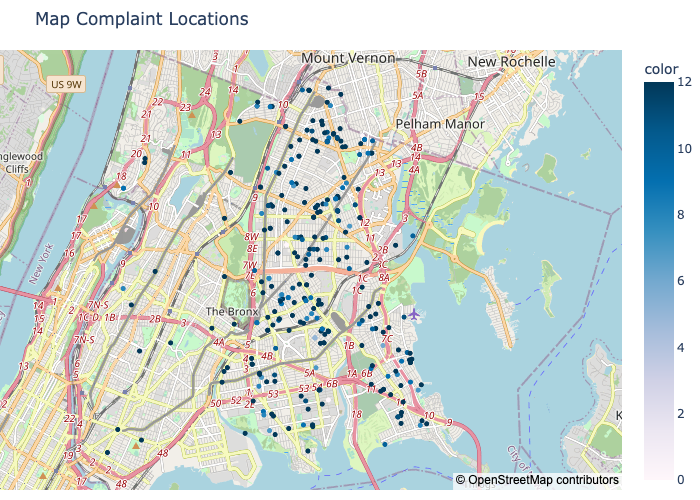

In [33]:
# Map complaint locations
fig = px.scatter_mapbox(df, lat=df['latitude'].astype(float).tolist(), lon=df['longitude'].astype(float).tolist(), hover_name="location_type", hover_data=[pd.to_datetime(df['created_date_format'], format='%Y%m%d').dt.strftime('%m/%d/%Y'),'status', 'resolution_description'],
                        color_continuous_scale="pubu",
                        range_color=(0, 12), zoom=11, height=500, title='Map Complaint Locations', color=pd.to_datetime(df['created_date_format'], format='%H:%M').dt.hour)
fig.update_layout(mapbox_style="open-street-map")
# margin{ right, top, left, bottom}
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})

# Render for interactive map in notebook
# fig.show()

# Render on github / not interactive; install kaleido
fig.show("png")


## What is Matplotlib

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

### Installation quick-start

```
pip install matplotlib
```

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pip install matplotlib


%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


#### How to File an E-Scooter Complaint
- Start here: https://portal.311.nyc.gov/article/?kanumber=KA-03442

The mobile app user enters "e-scooter" or "scooter", clicks "Search 311 Online for >", sent to the 311 website (online), click "Shared E-Scooter Pilot, scroll down and click "Parking Complaints and Maintenance, scroll down and click "Report a problem with an e-scooter or parking corral and sent to the "E-Scooter Complaint" form. *There's no direct link to file a complaint*

Data shows why **Phone** is the preferred option.

##### Message from NYC Open Data
> Only native service requests on mobile will register as “Mobile.” It is possible to submit an E-Scooter complaint on the mobile app, but it is through the mobile-fitted UI of our online portal. So any complaint filed via the mobile-fitted UI on their phone, will show-up in Open Data as “online.”


In [13]:
# Indicates how the complaint was submitted to 311. i.e. By Phone, Online, Mobile, Other or Unknown.
groups = df.groupby('open_data_channel_type')['community_board'].count()
print(groups)


open_data_channel_type
ONLINE      81
PHONE      231
UNKNOWN      2
Name: community_board, dtype: int64


<AxesSubplot: title={'center': 'Methods to Report Complaints'}, xlabel='Channel Type', ylabel='Total Reports'>

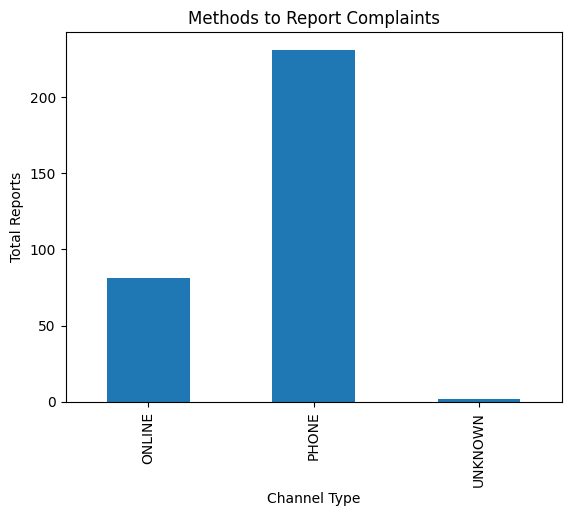

In [14]:
# calculate count of values by group
df_groups = df.groupby('open_data_channel_type')['community_board'].count()

# create bar plot by group
df_groups.plot(kind='bar', title='Methods to Report Complaints',
               xlabel='Channel Type', ylabel='Total Reports')


In [15]:
df.groupby('community_board')[
    'open_data_channel_type'].value_counts().unstack().fillna(0)


open_data_channel_type,ONLINE,PHONE,UNKNOWN
community_board,,,
01 BRONX,0.0,3.0,0.0
03 BRONX,0.0,1.0,0.0
04 BRONX,1.0,0.0,0.0
05 BRONX,2.0,1.0,0.0
06 BRONX,1.0,2.0,0.0
07 BRONX,1.0,1.0,0.0
08 BRONX,2.0,0.0,2.0
09 BRONX,14.0,27.0,0.0
10 BRONX,21.0,44.0,0.0


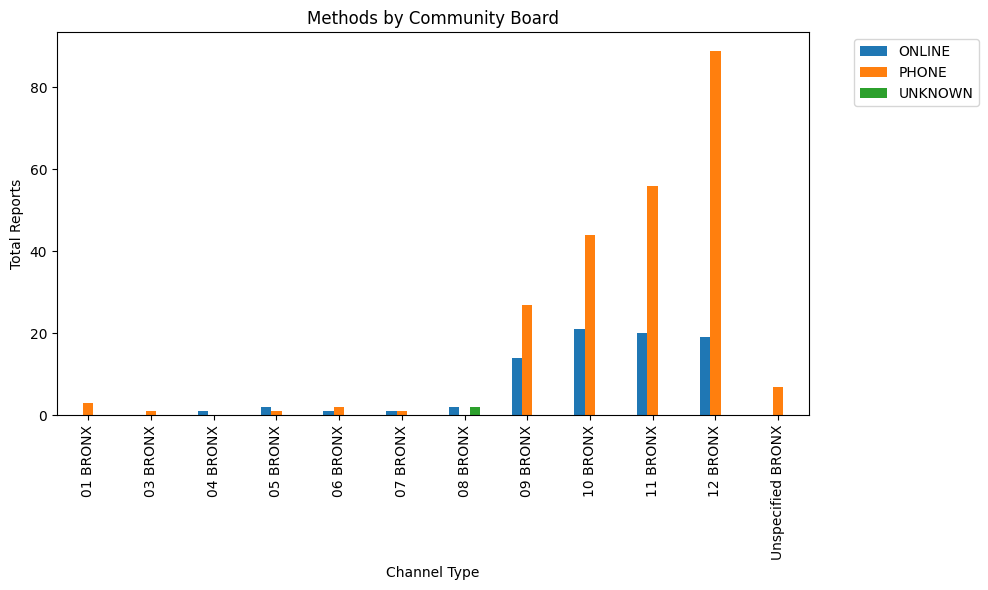

In [16]:
df_groups_cb = df.groupby('community_board')[
    'open_data_channel_type'].value_counts().unstack().fillna(0)
df_groups_cb.plot(kind='bar', title='Methods by Community Board',
                  xlabel='Channel Type', ylabel='Total Reports', stacked=False, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


In [17]:
# 311 complaints using the mobile app in The Bronx
mf = pd.DataFrame(open_data_channel_type_mobile_data)
mf[["complaint_type", "community_board"]].groupby(
    ["complaint_type", "community_board"]).value_counts().unstack().fillna(0)


community_board,01 BRONX,02 BRONX,03 BRONX,04 BRONX,05 BRONX,06 BRONX,07 BRONX,08 BRONX,09 BRONX,10 BRONX,11 BRONX,12 BRONX,27 BRONX,Unspecified BRONX
complaint_type,,,,,,,,,,,,,,
Abandoned Vehicle,2.0,0.0,3.0,1.0,2.0,0.0,2.0,2.0,5.0,4.0,2.0,2.0,0.0,0.0
Blocked Driveway,3.0,7.0,4.0,2.0,1.0,2.0,5.0,4.0,17.0,4.0,14.0,8.0,0.0,0.0
Dirty Condition,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
Encampment,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
Food Establishment,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
For Hire Vehicle Complaint,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HEAT/HOT WATER,14.0,11.0,21.0,69.0,65.0,40.0,58.0,18.0,30.0,15.0,59.0,10.0,0.0,0.0
Homeless Person Assistance,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Illegal Dumping,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


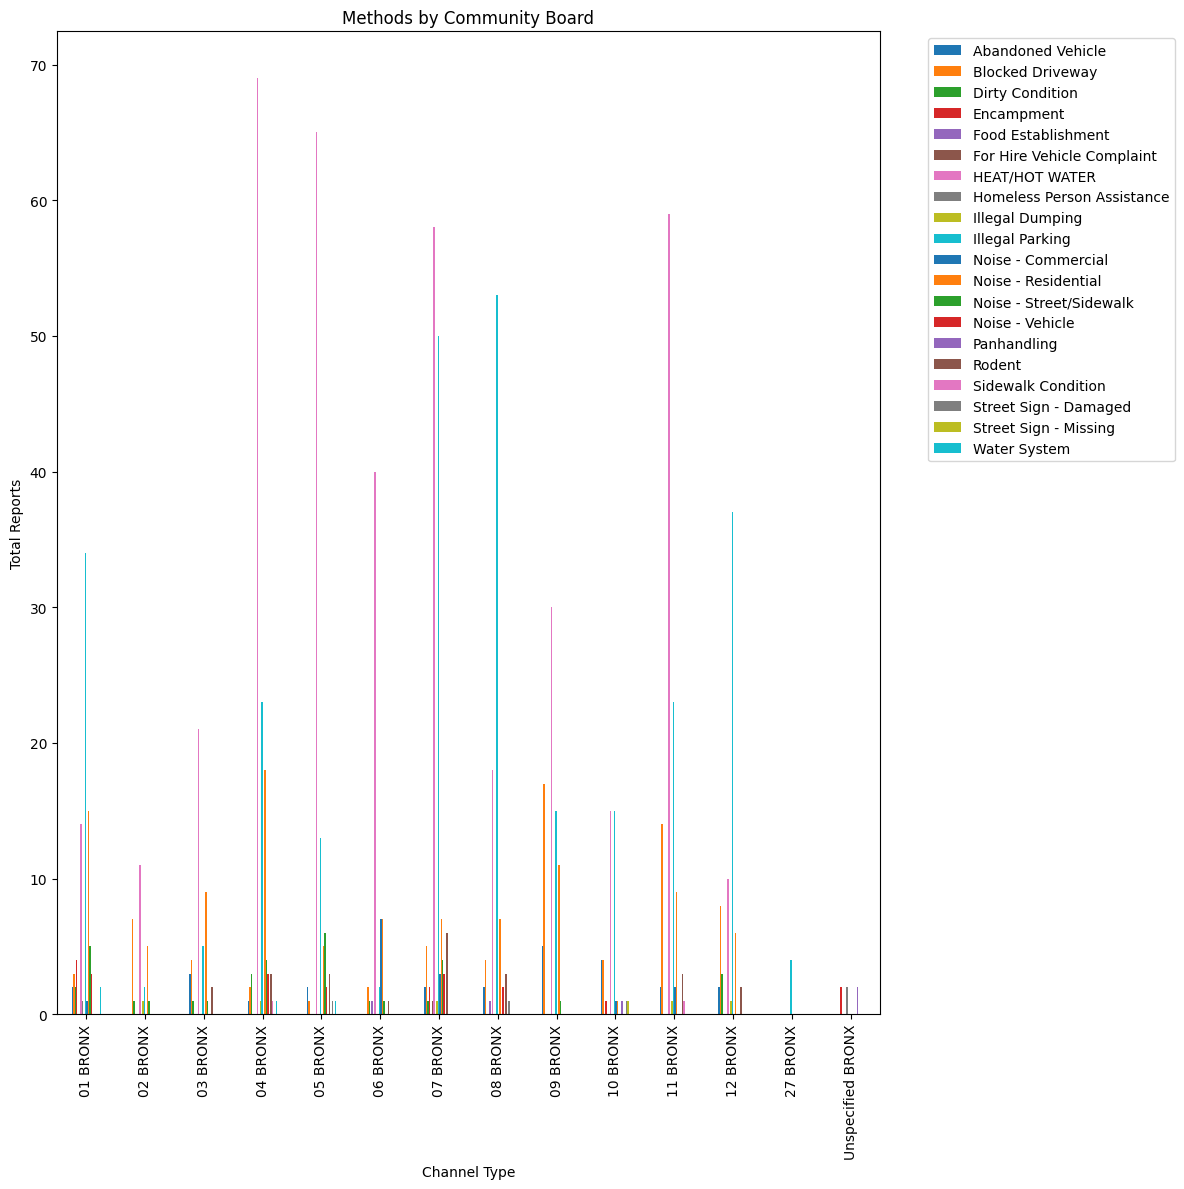

In [18]:
mf_groups_cb = mf.groupby('community_board')[
    'complaint_type'].value_counts().unstack().fillna(0)
mf_groups_cb.plot(kind='bar', title='Methods by Community Board',
                  xlabel='Channel Type', ylabel='Total Reports', stacked=False, figsize=(12, 12))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


In [19]:
# Query by e-scooter community
values = ["09 BRONX", "10 BRONX", "11 BRONX", "12 BRONX"]
mf_groups_mobile = mf.query("community_board in @values").groupby(
    'community_board')['complaint_type'].value_counts().unstack().fillna(0)
mf_groups_mobile.head()


complaint_type,Abandoned Vehicle,Blocked Driveway,Dirty Condition,Encampment,HEAT/HOT WATER,Illegal Dumping,Illegal Parking,Noise - Commercial,Noise - Residential,Noise - Street/Sidewalk,Panhandling,Rodent,Sidewalk Condition,Street Sign - Damaged,Street Sign - Missing
community_board,,,,,,,,,,,,,,,
09 BRONX,5.0,17.0,0.0,0.0,30.0,0.0,15.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0
10 BRONX,4.0,4.0,0.0,1.0,15.0,0.0,15.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
11 BRONX,2.0,14.0,0.0,0.0,59.0,1.0,23.0,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0
12 BRONX,2.0,8.0,3.0,0.0,10.0,1.0,37.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0


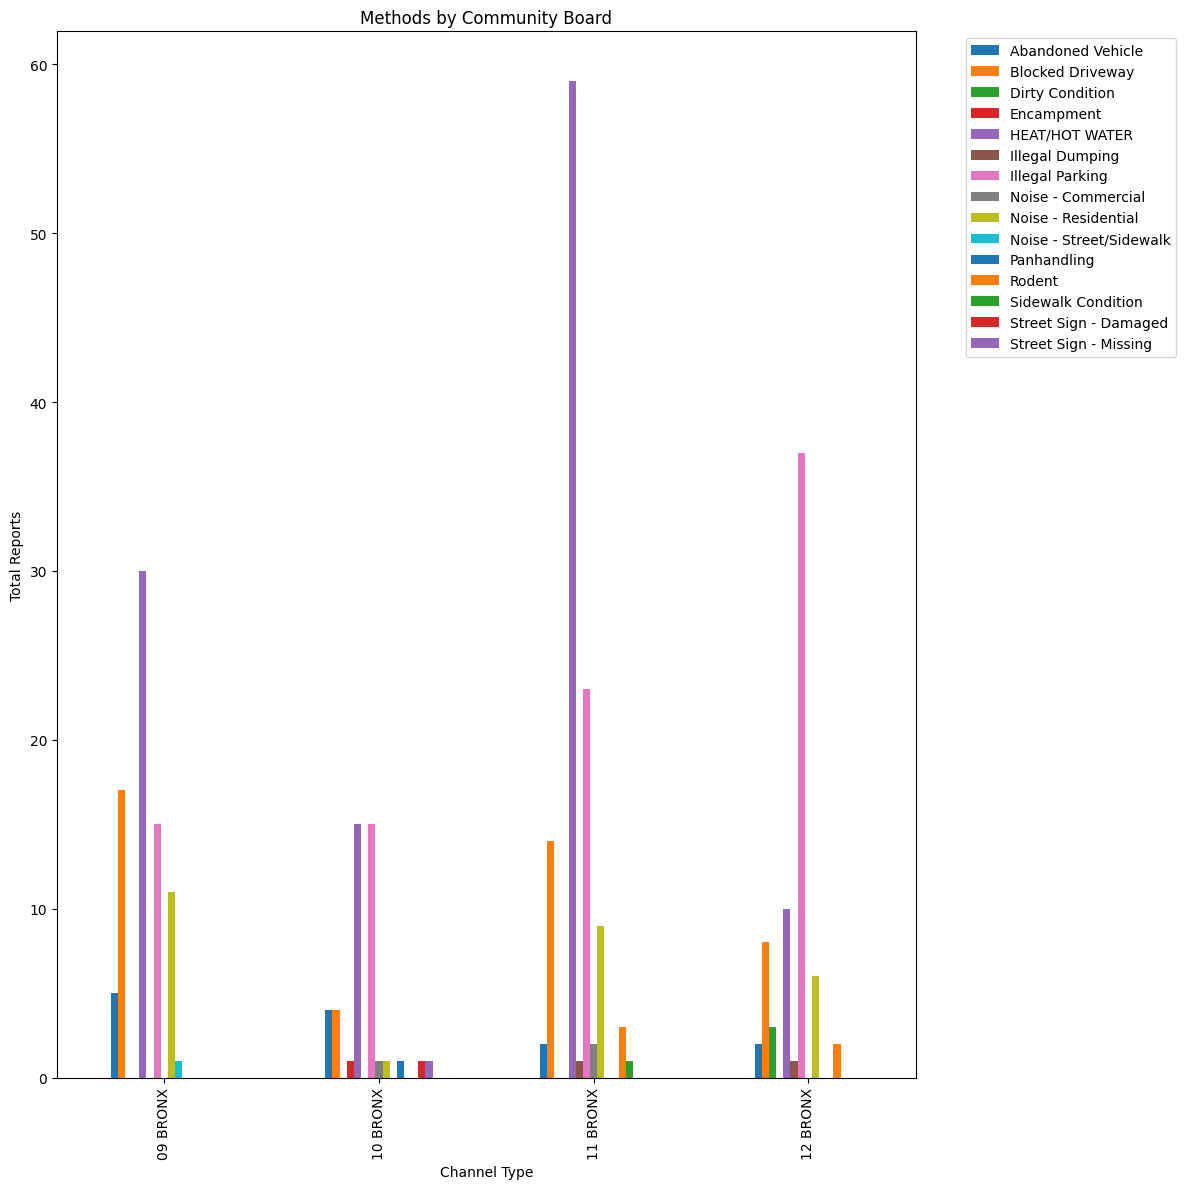

In [20]:
mf_groups_mobile = mf.query("community_board in @values").groupby(
    'community_board')['complaint_type'].value_counts().unstack().fillna(0)
mf_groups_mobile.plot(kind='bar', title='Methods by Community Board',
                      xlabel='Channel Type', ylabel='Total Reports', stacked=False, figsize=(12, 12))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


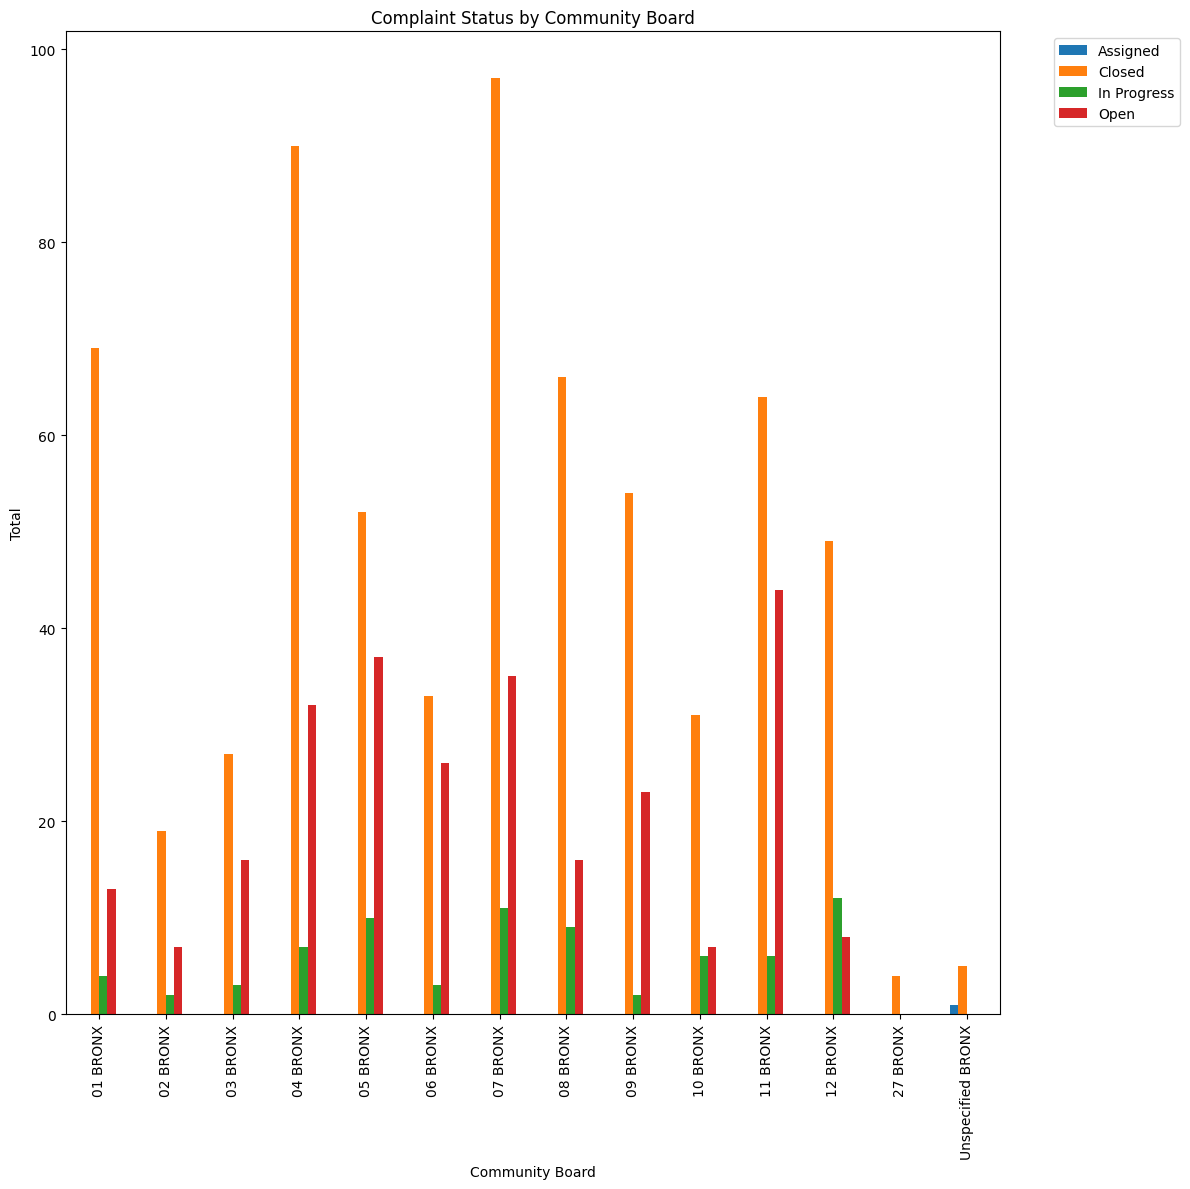

In [21]:
# Complaint Status by Community Board
mf_groups_mobile_status = mf.groupby('community_board')[
    'status'].value_counts().unstack().fillna(0)
mf_groups_mobile_status.plot(kind='bar', title='Complaint Status by Community Board',
                             xlabel='Community Board', ylabel='Total', stacked=False, figsize=(12, 12))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


In [22]:
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')
df['handling_time'] = (df['closed_date'] - df['created_date']).dt.days
# df['handling_time']
dfStatus = df.assign(handling_time=df['handling_time'])


In [23]:
dfStatus.describe()


,handling_time
count,314.000000
mean,1.942675
std,4.529974
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,68.000000


In [24]:
# The complaint with the longest 'Closed' time
dfStatus.loc[dfStatus['handling_time'].idxmax()]


unique_key                                                                 54736047
created_date                                                    2022-07-09 19:20:54
closed_date                                                     2022-09-16 15:05:24
agency                                                                          DOT
agency_name                                            Department of Transportation
complaint_type                                                            E-Scooter
descriptor                                           Improperly Parked or Abandoned
location_type                                                              Sidewalk
incident_zip                                                                  10470
incident_address                                               232 EAST  239 STREET
street_name                                                        EAST  239 STREET
cross_street_1                                                        KEPLER

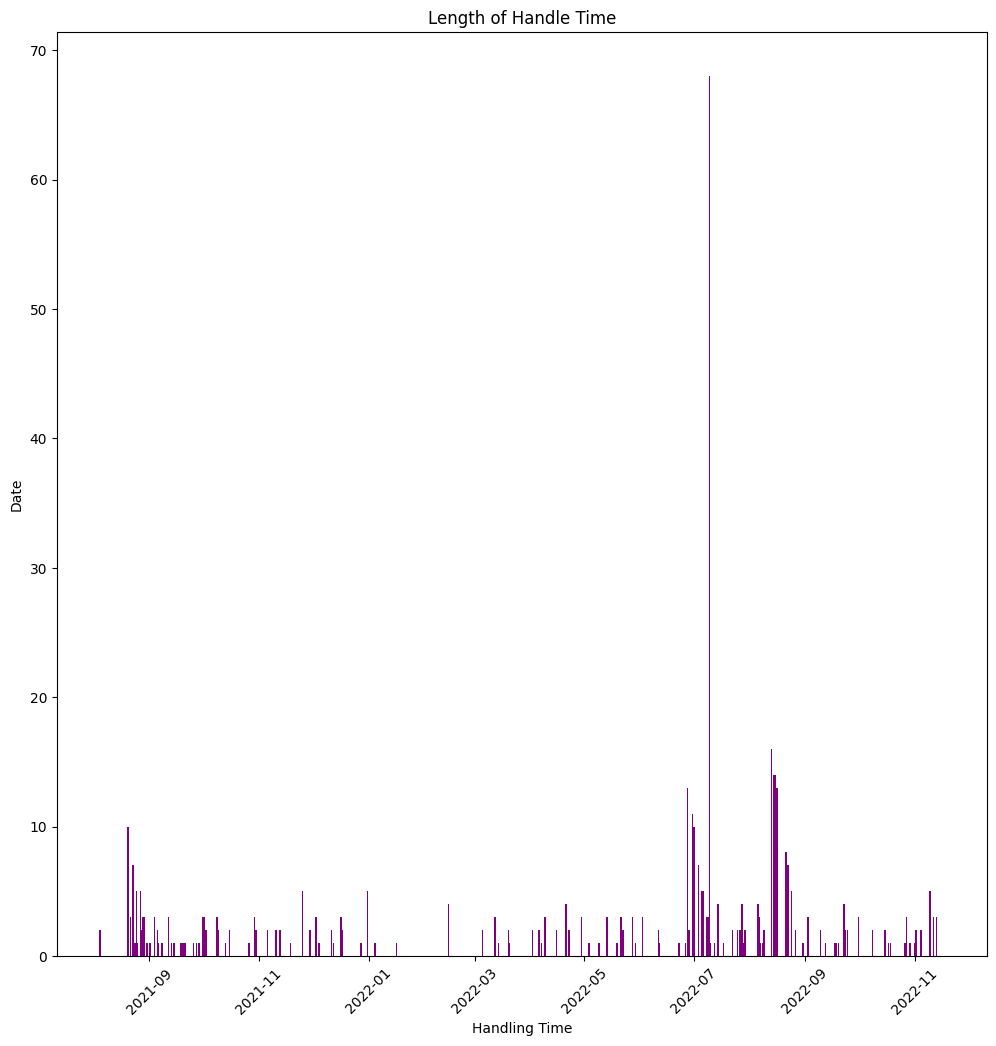

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(dfStatus['created_date'],
       dfStatus['handling_time'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Handling Time",
       ylabel="Date",
       title="Length of Handle Time")

plt.xticks(rotation=45)

plt.show()


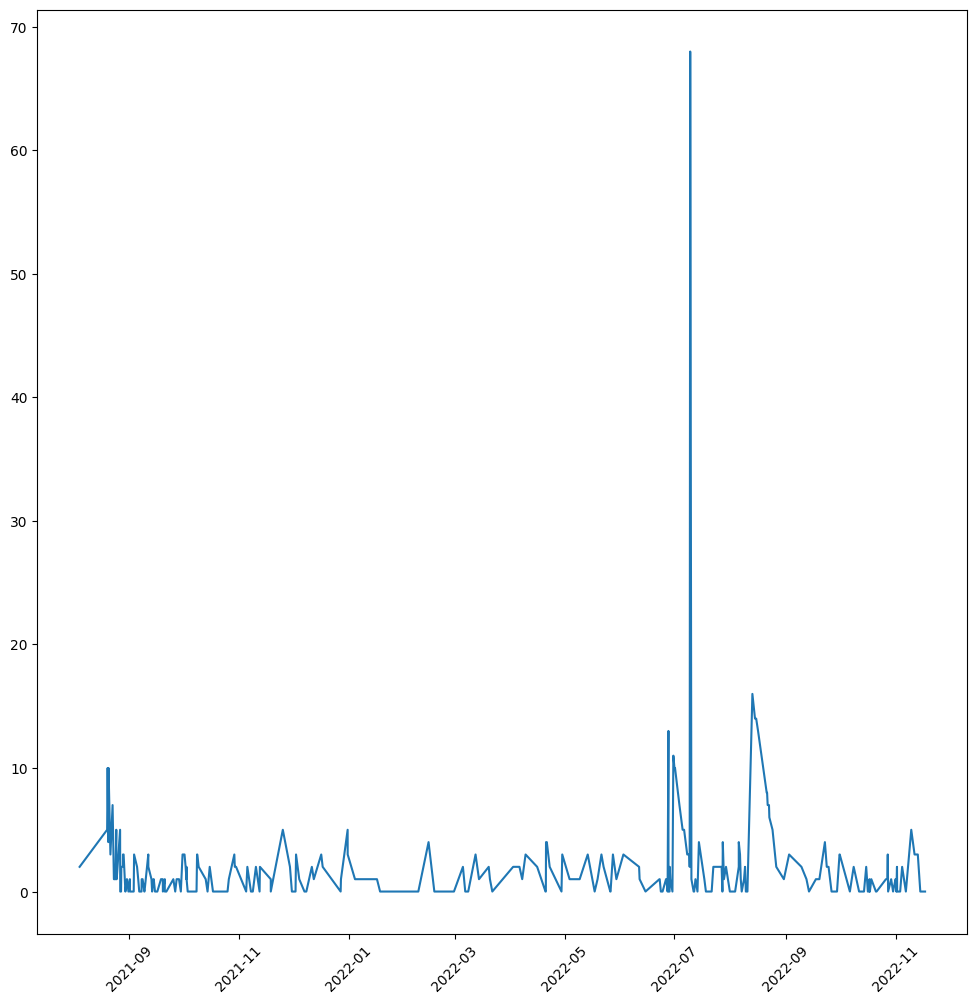

In [26]:
x = dfStatus['created_date']
y = dfStatus['handling_time']
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x, y)

plt.xticks(rotation=45)

plt.show()


In [27]:
dfStatus.groupby('community_board')[
    'status'].value_counts().unstack().fillna(0)


status,Closed
community_board,
01 BRONX,3
03 BRONX,1
04 BRONX,1
05 BRONX,3
06 BRONX,3
07 BRONX,2
08 BRONX,4
09 BRONX,41
10 BRONX,65


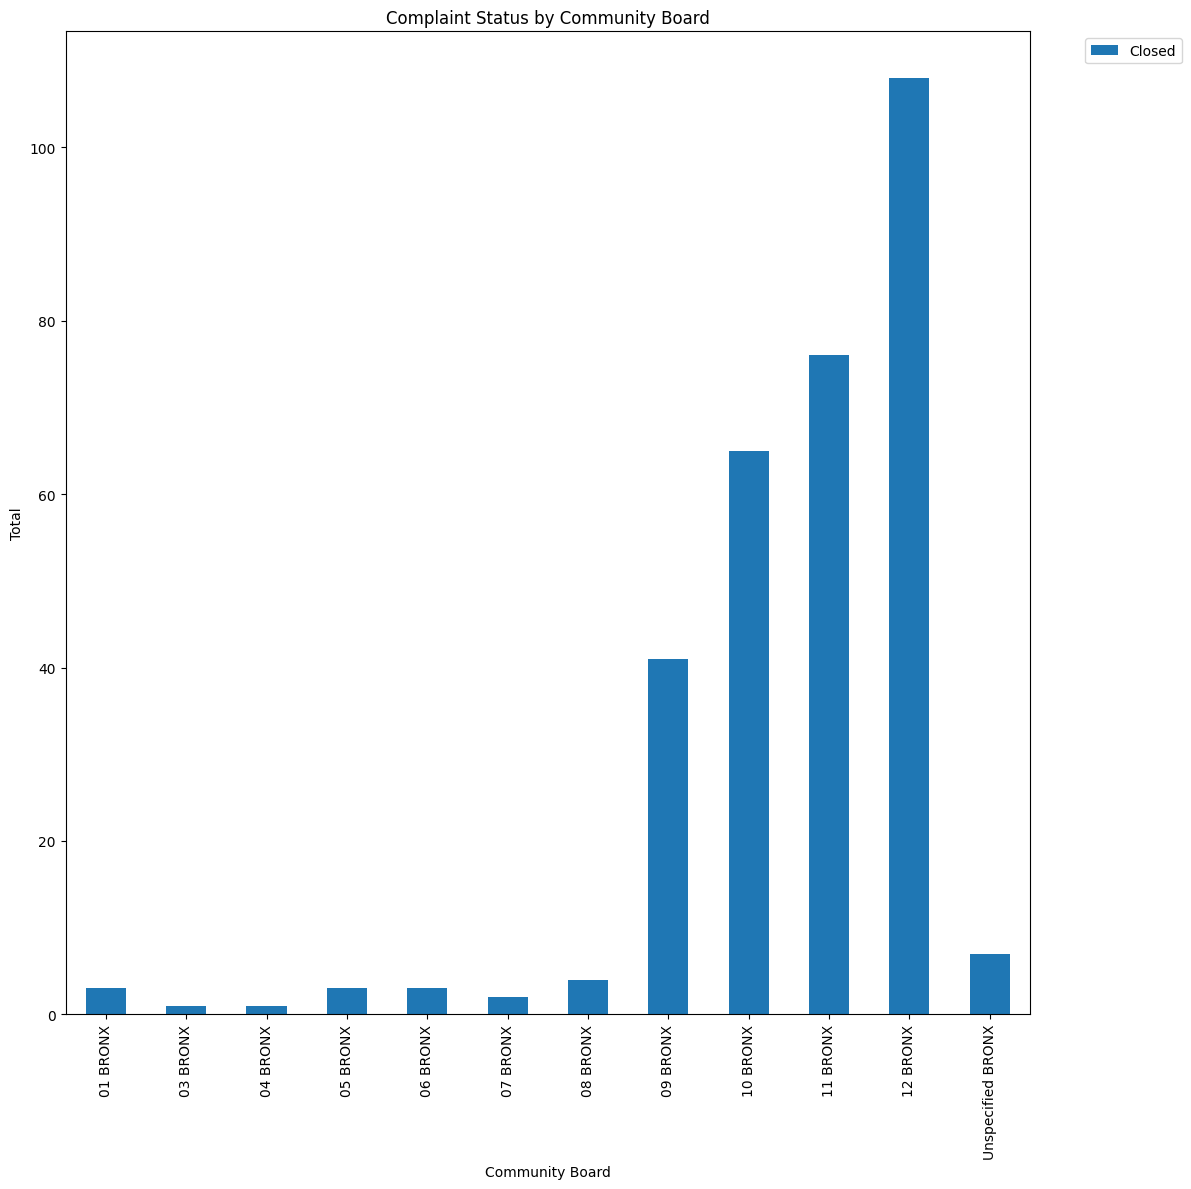

In [28]:
mf_groups_escooter_status = dfStatus.groupby(
    'community_board')['status'].value_counts().unstack().fillna(0)

mf_groups_escooter_status.plot(kind='bar', title='Complaint Status by Community Board',
                               xlabel='Community Board', ylabel='Total', stacked=False, figsize=(12, 12))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


In [29]:
alt.Chart(dfStatus).mark_bar().encode(
    x='community_board',
    y='handling_time'
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



alt.Chart(...)

In [30]:
alt.Chart(dfStatus).mark_area().encode(
    x='created_date:T',
    y='handling_time:Q',
    color='community_board:N',
).properties(height=250, width=800)


alt.Chart(...)

In [31]:
array = dfStatus['open_data_channel_type'].unique()
print('open_data_channel_type: ', array)
dfStatus.loc[dfStatus['open_data_channel_type'].isin(array)]


open_data_channel_type:  ['PHONE' 'ONLINE' 'UNKNOWN']


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,created_date_format,handling_time
0,56014728,2022-11-17 08:31:30,2022-11-17 09:15:44,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10472,1327 CROES AVENUE,...,1019812,242800,PHONE,Unspecified,BRONX,40.83303369910096,-73.87149086851551,"{'latitude': '40.83303369910096', 'longitude':...",2022-11-17 08:31:30,0
1,56011961,2022-11-16 12:18:38,2022-11-17 09:20:24,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10469,1263 BURKE AVENUE,...,1025630,256720,PHONE,Unspecified,BRONX,40.87121456687827,-73.85038068939417,"{'latitude': '40.87121456687827', 'longitude':...",2022-11-16 12:18:38,0
2,55990649,2022-11-14 22:43:51,2022-11-15 10:32:30,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10456,1346 FINDLAY AVENUE,...,1009108,244030,ONLINE,Unspecified,BRONX,40.83644630655205,-73.91016694046635,"{'latitude': '40.83644630655205', 'longitude':...",2022-11-14 22:43:51,0
3,55983150,2022-11-14 17:07:28,2022-11-15 10:43:00,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10467,ARNOW AVENUE,...,1020959,255501,PHONE,Unspecified,BRONX,40.867889449868514,-73.86727646042412,"{'latitude': '40.867889449868514', 'longitude'...",2022-11-14 17:07:28,0
4,55984668,2022-11-14 16:47:30,2022-11-15 10:38:52,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10473,2242 VIRGIL PLACE,...,1026468,239038,PHONE,Unspecified,BRONX,40.822678789552015,-73.84746203644735,"{'latitude': '40.822678789552015', 'longitude'...",2022-11-14 16:47:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,51581815,2021-08-20 10:44:21,2021-08-25 08:56:39,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10469,2210 TIEMAN AVENUE,...,1029021,251861,PHONE,Unspecified,BRONX,40.85786155796099,-73.83815220363218,"{'latitude': '40.85786155796099', 'longitude':...",2021-08-20 10:44:21,4
310,51583155,2021-08-20 09:32:05,2021-08-25 08:51:54,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10461,MAYFLOWER AVENUE,...,1029973,246631,ONLINE,Unspecified,BRONX,40.84350190355509,-73.8347463857145,"{'latitude': '40.84350190355509', 'longitude':...",2021-08-20 09:32:05,4
311,51574842,2021-08-19 23:38:48,2021-08-30 16:54:48,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10461,1638 HERING AVENUE,...,1026363,248496,PHONE,Unspecified,BRONX,40.84863872692005,-73.84778202946549,"{'latitude': '40.84863872692005', 'longitude':...",2021-08-19 23:38:48,10
312,51574776,2021-08-19 17:02:46,2021-08-25 08:48:14,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10462,VICTOR STREET,...,NaN,NaN,PHONE,Unspecified,BRONX,NaN,NaN,NaN,2021-08-19 17:02:46,5
